In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

In [2]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from PIL import Image
import os

__Displaying Original Image__

(-0.5, 539.5, 305.5, -0.5)

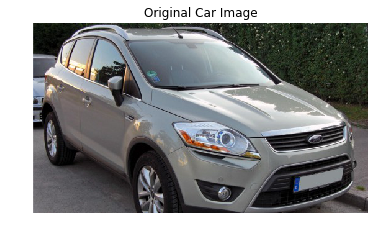

In [3]:
image= Image.open("C:\\Data\\img Aug\\car2.jpeg")
plt.imshow(image)
plt.title("Original Car Image")
plt.axis('off')

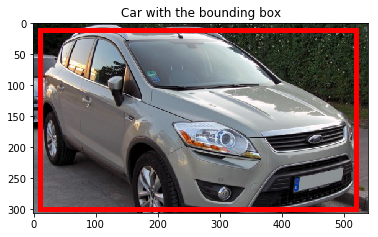

In [4]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# create a bounding box around the car using rectangle with xy as bottom left coordinates and width and height
rect = patches.Rectangle((10,10), 510,290, linewidth=5, edgecolor='r', facecolor='None')

# Add the patch to the Axes
ax.add_patch(rect)
#ax.axis('off') # disable axis

plt.title('Car with the bounding box')
plt.show()

In [5]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

In [6]:
image = imageio.imread("C:\\Data\\img Aug\\car2.jpeg")
ia.imshow(image)

AttributeError: module 'imgaug' has no attribute 'imshow'

In [ ]:
image = imageio.imread("C:\\Data\\img Aug\\car2.jpeg")
rotate=iaa.Affine(rotate=(-50, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)


In [ ]:
image = imageio.imread("C:\\Data\\img Aug\\car2.jpeg")
gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
noise_image=gaussian_noise.augment_image(image)
ia.imshow(noise_image)

In [ ]:
crop = iaa.Crop(percent=(0, 0.3)) # crop image
corp_image=crop.augment_image(image)
ia.imshow(corp_image)

In [ ]:
shear = iaa.Affine(shear=(0,40))
shear_image=shear.augment_image(image)
ia.imshow(shear_image)

In [ ]:
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

In [ ]:
flip_vr=iaa.Flipud(p=0.5)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)

In [ ]:
#scale to 80-120% of image height/width (each axis independently)
image = imageio.imread("C:\\Data\\img Aug\\car2.jpeg")
scale_im=iaa.Affine(scale={"x": (1.5, 0.8), "y": (1.5, 0.8)})
scale_image =scale_im.augment_image(image)
ia.imshow(scale_image)

In [ ]:
image = imageio.imread("C:\\Data\\img Aug\\car2.jpeg")
contrast=iaa.GammaContrast(gamma=2)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

In [ ]:
elastic_trans = iaa.ElasticTransformation(alpha=50, sigma=9) # water-like effect
trans_image=elastic_trans.augment_image(image)
ia.imshow(trans_image)

In [ ]:
aug = iaa.Affine(translate_px=50)
trans_image=aug.augment_image(image)
ia.imshow(trans_image)

In [ ]:
coarse_drop = iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)# set large image areas to zero
image_coarse = coarse_drop.augment_images(image)
ia.imshow(image_coarse)

In [ ]:
image_rotated = rotate.augment_images([image])
image_noise = gaussian_noise.augment_images([image])
image_crop = crop.augment_images([image])
#image_hue = hue.augment_images([image])
image_trans = elastic_trans.augment_images([image])
image_coarse = coarse_drop.augment_images([image])

# create an array of augmented images for the demo
images_aug = [image_rotated[0], image_noise[0], image_crop[0],  image_trans[0], image_coarse[0]]

# plot augmentation examples
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(np.hstack(images_aug))
plt.title('Sample augmentations')

In [ ]:
# import bounding boxes from imgaug
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [ ]:
# initialize the bounding box for the original image
# using helpers from imgaug package
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=10, x2=520, y1=10, y2=300)
], shape=image.shape)

In [ ]:
ia.imshow(bbs.draw_on_image(image, size=2))

In [ ]:
move=iaa.Affine(translate_percent={"x": 0.1}, scale=0.8)
image_aug, bbs_aug = move(image=image, bounding_boxes=bbs)
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))

In [ ]:
image = imageio.imread("C:\\Data\\img Aug\\car2.jpeg")
rotate_bb=iaa.Affine(rotate=(-50, 30))
image_aug, bbs_aug = rotate_bb(image=image, bounding_boxes=bbs)
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))

In [ ]:
def pad(image, by):
    image_border1 = ia.pad(image, top=1, right=1, bottom=1, left=1,
                           mode="constant", cval=255)
    image_border2 = ia.pad(image_border1, top=by-1, right=by-1,
                           bottom=by-1, left=by-1,
                           mode="constant", cval=0)
    return image_border2

In [ ]:
def draw_bbs(image, bbs, border):
    GREEN = [0, 255, 0]
    ORANGE = [255, 140, 0]
    RED = [255, 0, 0]
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:
        if bb.is_fully_within_image(image.shape):
            color = GREEN
        elif bb.is_partly_within_image(image.shape):
            color = ORANGE
        else:
            color = RED
        image_border = bb.shift(left=border, top=border)\
                         .draw_on_image(image_border, size=2, color=color)

    return image_border

In [ ]:
rotate=iaa.Affine(rotate=(-50, 30))
image_aug, bbs_aug = rotate(image=image, bounding_boxes=bbs)

image_after3 = draw_bbs(image_aug, bbs_aug.remove_out_of_image().clip_out_of_image(), 100)
ia.imshow(image_after3)
ia.s

In [ ]:
# define a simple augmentations pipeline for the image with bounding box
seq = iaa.Sequential([
    iaa.GammaContrast(5.5), # add contrast
    iaa.Affine(translate_percent={"x": 0.1}, scale=0.8), # translate the image
    iaa.Fliplr(p = 1.0) # apply horizontal flip
])

# apply augmentations
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)


In [ ]:
# using helpers from imgaug package
side_by_side = np.hstack([
    bbs.draw_on_image(image, size=2),
    bbs_aug.draw_on_image(image_aug, size=2)
])

fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(side_by_side)

In [ ]:
# initialize the bounding box for the original image
# using helpers from imgaug package
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=10, x2=520, y1=10, y2=300)
], shape=image.shape)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot



In [ ]:

# create data generator
datagen = ImageDataGenerator()

In [ ]:
# load the image
img = load_img("C:\\Data\\img Aug\\car2.jpeg")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(10):
    # define subplot
    pyplot.subplot(5,2, 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()